# Instruction Dataset creation tutorial

> Modified from [Dataset creation for fine-tuning LLM.ipynb](https://colab.research.google.com/drive/1GH8PW9-zAe4cXEZyOIE-T9uHXblIldAg?usp=sharing) by **Maxime Labonne** 

- High-quality data is fundamental to produce a good model. The higher the quality, the better the model. In this notebook, we will create a dataset for fine-tuning LLMs.
- **Instruction dataset**
    - inputs are instructions (e.g., questions) and outputs correspond to the expected responses (e.g., answers). *Example: Open-Orca.*



As an example, we will filter the excellent [Open-Platypus dataset](https://huggingface.co/datasets/garage-bAInd/Open-Platypus). Note, it is already a collection of different datasets:

| Dataset Name                                                 | License Type |
|--------------------------------------------------------------|--------------|
| [PRM800K](https://github.com/openai/prm800k)                 | MIT          |
| [ScienceQA](https://github.com/lupantech/ScienceQA) | [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)    |
| [SciBench](https://github.com/mandyyyyii/scibench)    | MIT      |
| [ReClor](https://whyu.me/reclor/)                            | Non-commercial      |
| [TheoremQA](https://huggingface.co/datasets/wenhu/TheoremQA) | MIT      |
| [`nuprl/leetcode-solutions-python-testgen-gpt4`](https://huggingface.co/datasets/nuprl/leetcode-solutions-python-testgen-gpt4/viewer/nuprl--leetcode-solutions-python-testgen-gpt4/train?p=1) | None listed |
| [`jondurbin/airoboros-gpt4-1.4.1`](https://huggingface.co/datasets/jondurbin/airoboros-gpt4-1.4.1) | other |
| [`TigerResearch/tigerbot-kaggle-leetcodesolutions-en-2k`](https://huggingface.co/datasets/TigerResearch/tigerbot-kaggle-leetcodesolutions-en-2k/viewer/TigerResearch--tigerbot-kaggle-leetcodesolutions-en-2k/train?p=2) | apache-2.0 |
| [openbookQA](https://huggingface.co/datasets/openbookqa/viewer/additional/train?row=35) | apache-2.0      |
| [ARB](https://arb.duckai.org)                                | MIT      |
| [`timdettmers/openassistant-guanaco`](https://huggingface.co/datasets/timdettmers/openassistant-guanaco)                                | apache-2.0      |

## 1. Load and analyze the dataset

In [31]:
import os
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# get or add the Huggingface token key
HF_TOKEN = os.getenv("HF_TOKEN")

In [43]:
# Load the dataset
dataset = load_dataset("garage-bAInd/Open-Platypus")
dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction', 'data_source'],
        num_rows: 24926
    })
})

In [44]:
# Read the Dataframe in pandas
dataset['train'].to_pandas().head()

,input,output,instruction,data_source
0,,To find the probability of the spinner landing...,A board game spinner is divided into three par...,MATH/PRM-800K
1,,"I need to choose 6 people out of 14, and the o...",My school's math club has 6 boys and 8 girls. ...,MATH/PRM-800K
2,,First we count the number of all 4-letter word...,How many 4-letter words with at least one cons...,MATH/PRM-800K
3,,She can do this if and only if at least one of...,Melinda will roll two standard six-sided dice ...,MATH/PRM-800K
4,,Think of the problem as a sequence of H's and ...,"Let $p$ be the probability that, in the proces...",MATH/PRM-800K


In [45]:
# Get the number of rows in the dataset for each data source
source_counts = dataset['train'].to_pandas()['data_source'].value_counts()
source_counts

data_source
MATH/PRM-800K      12298
reclor              4530
airoboros           2605
scienceqa           1317
leetcode_ne         1100
guanaco              797
ARB                  713
scibench             616
theoremqa            564
tigerbot-kaggle      386
Name: count, dtype: int64

In [46]:
# print one example
for k,v in dataset['train'][0].items():
    print(f"{k}: {v}")

input: 
output: To find the probability of the spinner landing on $C$, I need to subtract the probabilities of the spinner landing on $A$ and $B$ from $1$, since the sum of the probabilities of all possible outcomes is $1$. I can write this as an equation: $P(C) = 1 - P(A) - P(B)$. I know that $P(A) = \frac{1}{3}$ and $P(B) = \frac{5}{12}$, so I can plug those values into the equation and simplify. I get: $P(C) = 1 - \frac{1}{3} - \frac{5}{12} = \frac{12}{12} - \frac{4}{12} - \frac{5}{12} = \frac{3}{12}$. I can reduce this fraction by dividing the numerator and denominator by $3$, and I get: $P(C) = \frac{1}{4}$. 
instruction: A board game spinner is divided into three parts labeled $A$, $B$  and $C$. The probability of the spinner landing on $A$ is $\frac{1}{3}$ and the probability of the spinner landing on $B$ is $\frac{5}{12}$.  What is the probability of the spinner landing on $C$? Express your answer as a common fraction.
data_source: MATH/PRM-800K


#### Load the tokenizer corresponding to Llama-2

In [47]:
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")


#### Tokenize each row and count the number of tokens


In [48]:
instruction_token_counts = [len(tokenizer.tokenize(example["instruction"])) for example in dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in dataset['train']]
combined_token_counts = [instruction_token_count + output_token_count for instruction_token_count, output_token_count in zip(instruction_token_counts, output_token_counts)]

#### Plot the distribution of token counts


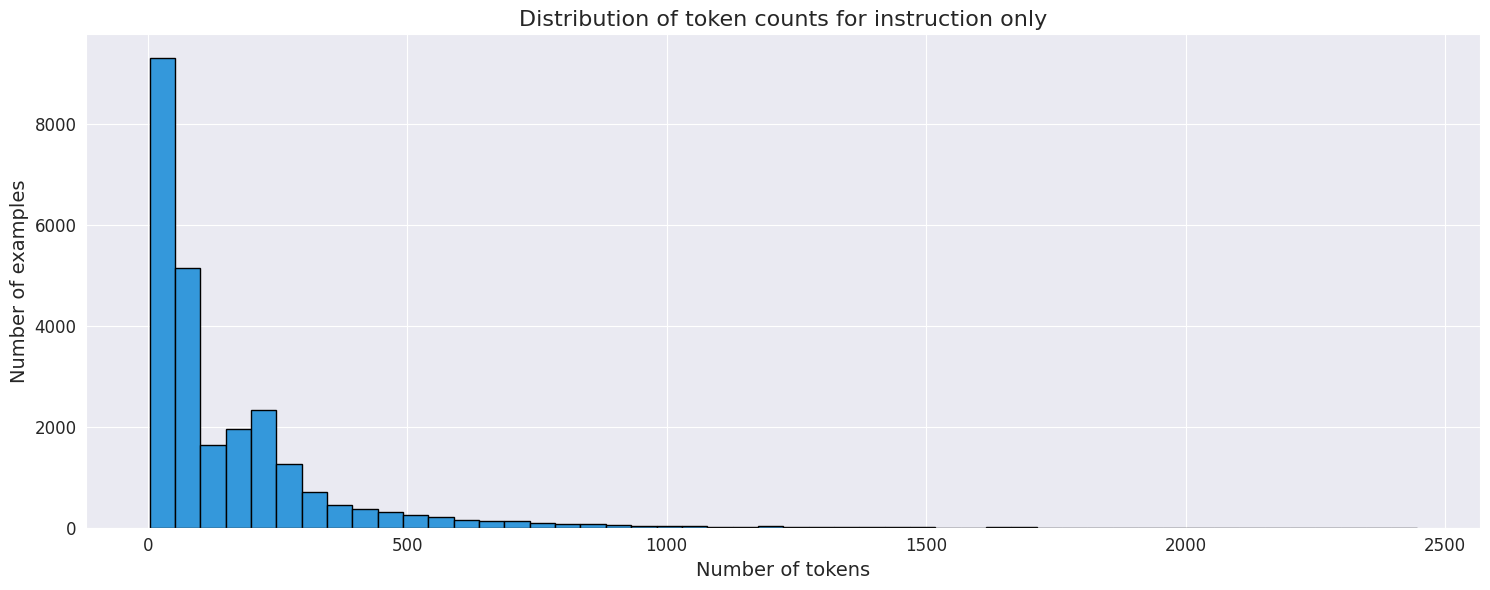

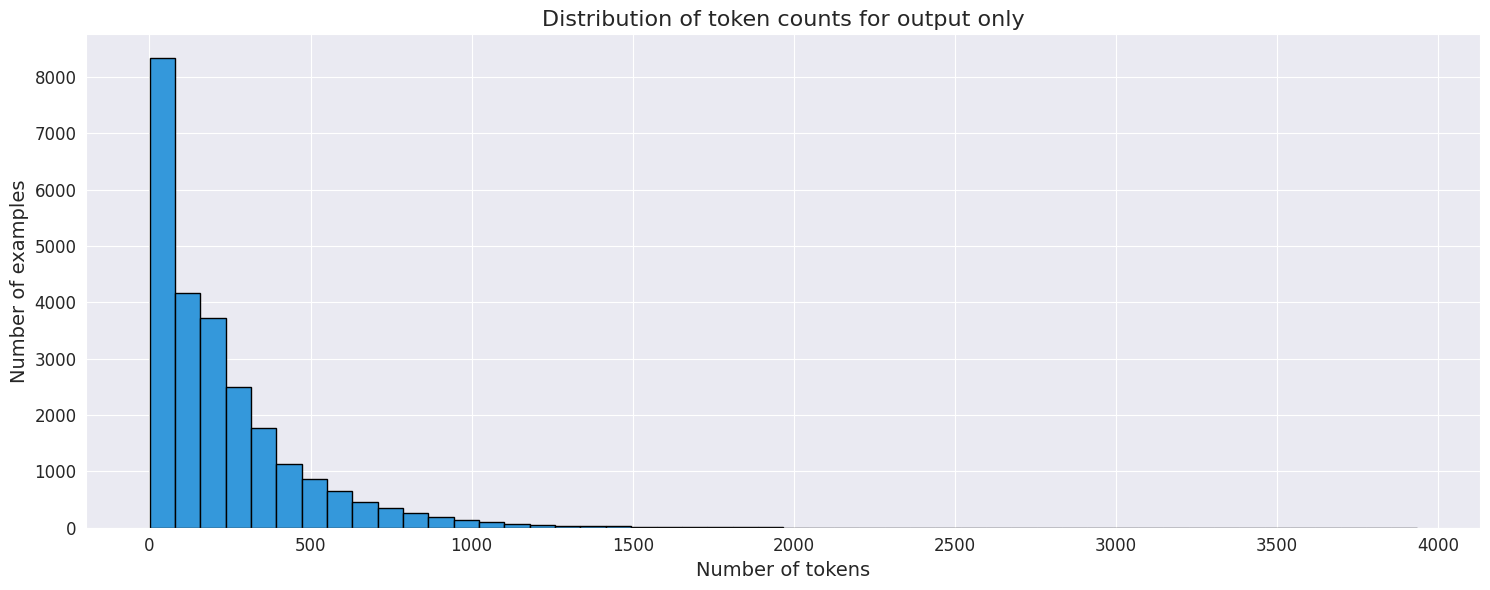

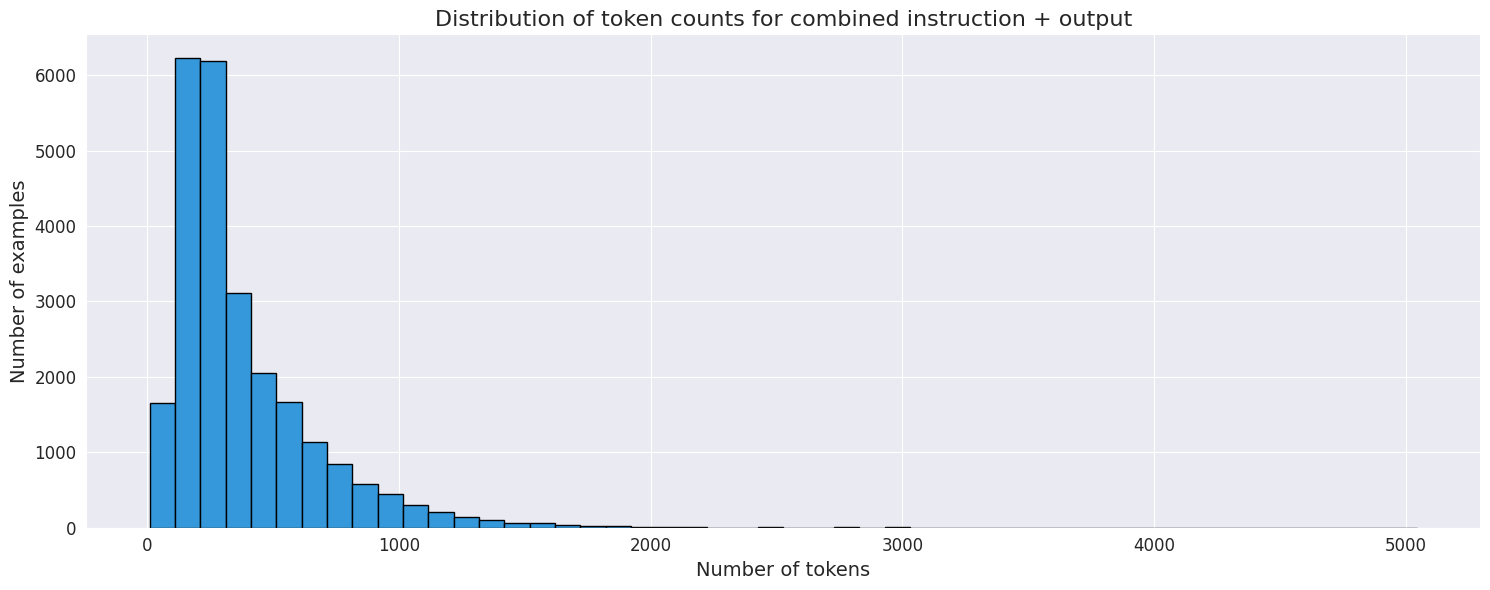

In [49]:
# Helper function to plot the distributions
def plot_distribution(token_counts, title):
    sns.set_style("darkgrid")
    plt.figure(figsize=(15, 6))
    plt.hist(token_counts, bins=50, color='#3498db', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel("Number of tokens", fontsize=14)
    plt.ylabel("Number of examples", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

> It's important to know the examples tokens count as all models have some context length. For example, max context size of Llama 2 by default is `4096`. It is best to remove the examples with token count > max_context_length

## 2. Filter out rows with more than 2048 tokens

For example purpose, we can remove samples with more than 2048 tokens.

Number of valid rows: 24895
Removing 31 rows...


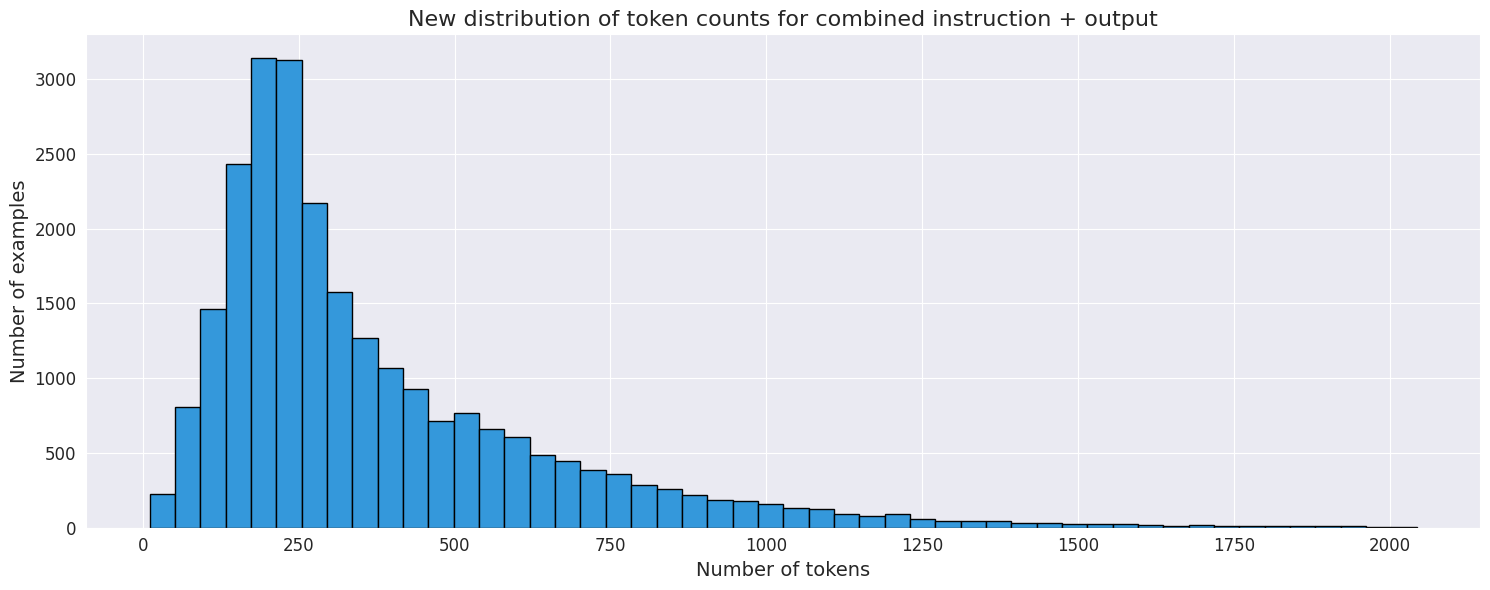

In [50]:
# Filter out rows with more than 2048 tokens
valid_indices = [i for i, count in enumerate(combined_token_counts) if count <=2048]
print(f"Number of valid rows: {len(valid_indices)}")
print(f"Removing {len(dataset['train']) - len(valid_indices)} rows...")

# Extract valid rows based on indices
dataset['train'] = dataset['train'].select(valid_indices)

# Get token counts for valid rows
token_counts = [combined_token_counts[i] for i in valid_indices]

plot_distribution(token_counts, "New distribution of token counts for combined instruction + output")

## 3. Near-deduplication using embeddings

- How to choose the embedding model? Check the [MTEB leaderboard](https://huggingface.co/spaces/mteb/leaderboard). In this example, we're not using the best embedding model because it would take too long.

- Use the embedding models to find the similarity between the examples. Then, based on the similarity score remove the duplicate examples.

- Faiss is a vector database by Meta, not the best but quite simple and useful for this case.

In [35]:
from sentence_transformers import SentenceTransformer
import faiss
from datasets import Dataset, DatasetDict
from tqdm.notebook import tqdm
import numpy as np

### Create embeddings and index

In [39]:
embedding_model = "mixedbread-ai/mxbai-embed-large-v1"
sentence_model = SentenceTransformer(embedding_model)
# we don't want the similar outputs
outputs = [example["output"] for example in dataset['train']]

print("Converting text to embeddings...")
embeddings = sentence_model.encode(outputs, show_progress_bar=True)
dimension = embeddings.shape[1]
print("Create index...")
index = faiss.IndexFlatIP(dimension)
normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
index.add(normalized_embeddings)

Converting text to embeddings...


Batches:   0%|          | 0/778 [00:00<?, ?it/s]

In [64]:
print("Filtering out near-duplicates...")
threshold = 0.877
# approx. same as 0.95 threshold for "thenlper/gte-large" embedding model

# D: distance, I: indices
D, I = index.search(normalized_embeddings, k=2)
to_keep = []

for i in tqdm(range(len(embeddings)), desc="Filtering"):
    # If the second closest vector (D[i, 1]) has cosine similarity above the threshold
    if D[i, 1] >= threshold:
        # Check if either the current item or its nearest neighbor is already in the to_keep list
        nearest_neighbor = I[i, 1]
        if i not in to_keep and nearest_neighbor not in to_keep:
            # If not, add the current item to the list
            to_keep.append(i)
    else:
        # If the similarity is below the threshold, always keep the current item
        to_keep.append(i)

deduped_dataset = dataset['train'].select(to_keep)
deduped_dataset = DatasetDict({"train": deduped_dataset})

Filtering out near-duplicates...


Filtering:   0%|          | 0/24895 [00:00<?, ?it/s]

In [65]:
print(f"Number of samples in the original dataset: {len(dataset['train'])}")
print(f"Number of samples in the deduped dataset: {len(deduped_dataset['train'])}")
print(f"Number of samples that were removed: {len(dataset['train']) - len(deduped_dataset['train'])}")

Number of samples in the original dataset: 24895
Number of samples in the deduped dataset: 16585
Number of samples that were removed: 8310


## 4. Top-k sampling



In [66]:
k = 1000  # Only keep the top k samples with the most tokens.

In [67]:
# Get the top k rows with the most tokens
def get_top_k_rows(dataset, token_counts, k):
    # Sort by descending token count and get top k indices
    sorted_indices = sorted(range(len(token_counts)), key=lambda i: token_counts[i], reverse=True)
    top_k_indices = sorted_indices[:k]

    # Extract top k rows
    top_k_data = {
        "instruction": [dataset['train'][i]["instruction"] for i in top_k_indices],
        "output": [dataset['train'][i]["output"] for i in top_k_indices]
    }

    return Dataset.from_dict(top_k_data)

# Get token counts
instruction_token_counts = [len(tokenizer.tokenize(example["instruction"])) for example in deduped_dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in deduped_dataset['train']]
combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

k = 1000  # You can adjust this value as needed
top_k_dataset = get_top_k_rows(deduped_dataset, combined_token_counts, k)

# Save these rows in a Dataset object with a 'train' split
dataset = DatasetDict({"train": top_k_dataset})

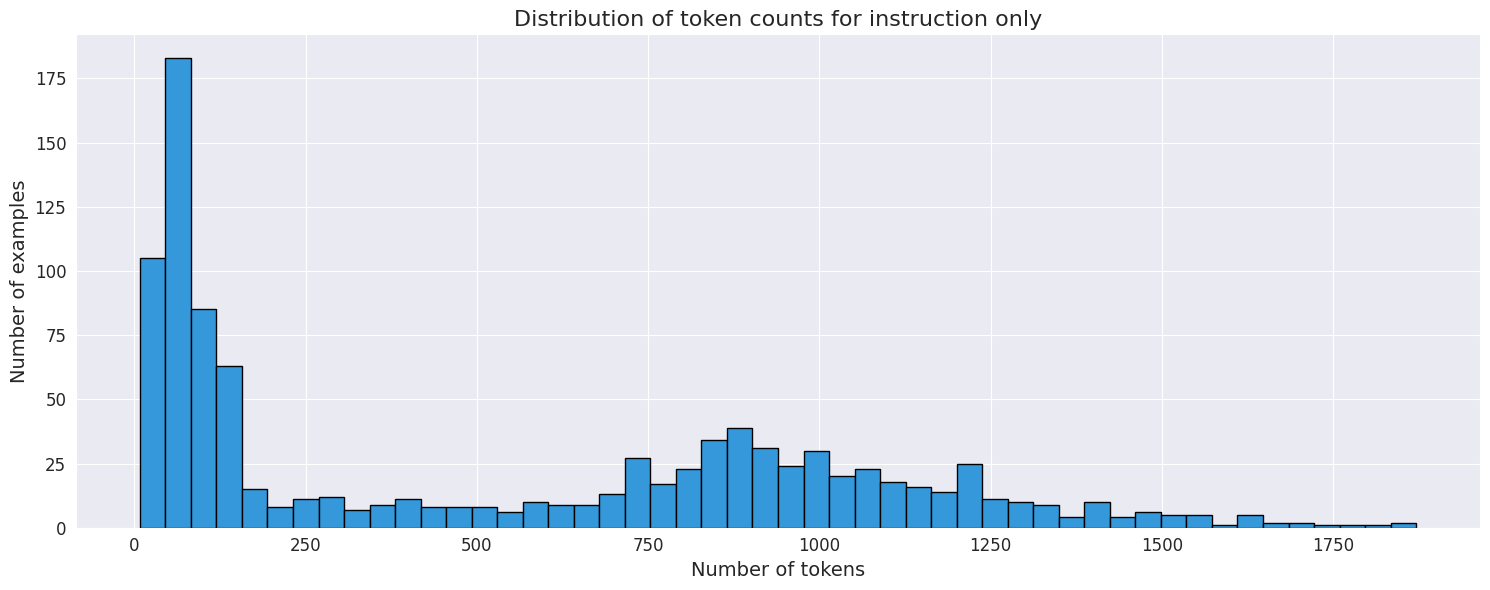

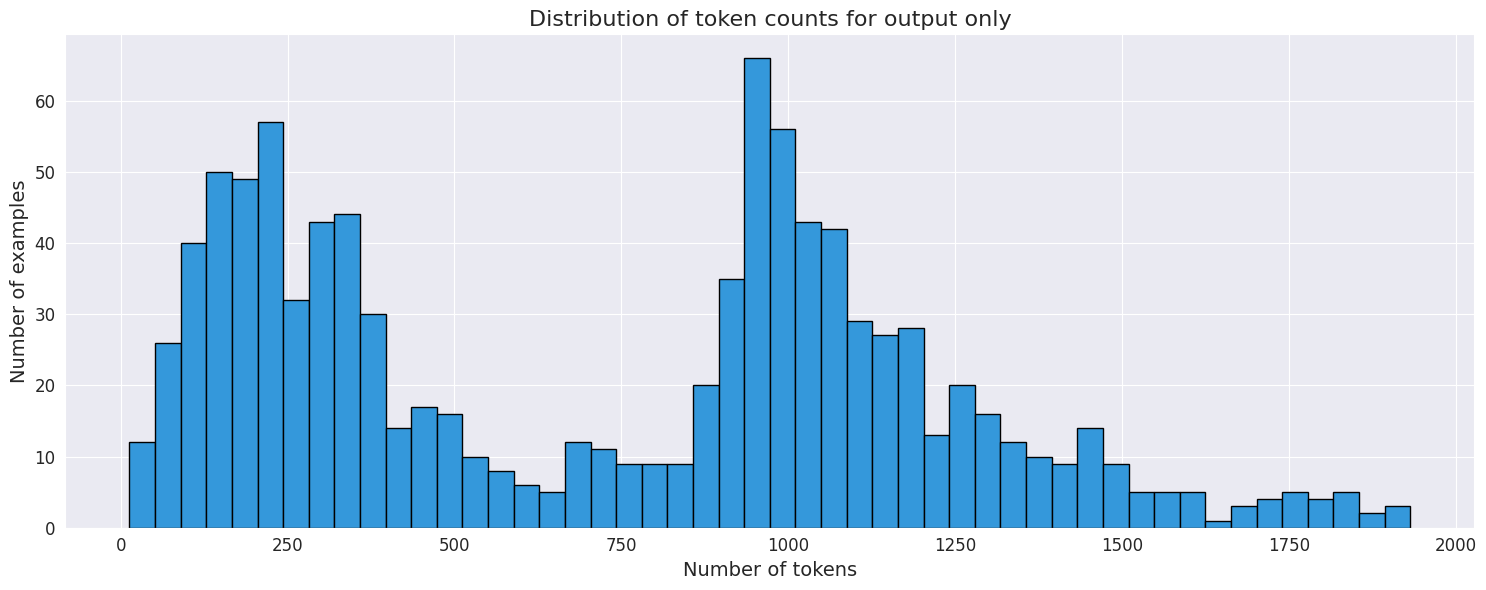

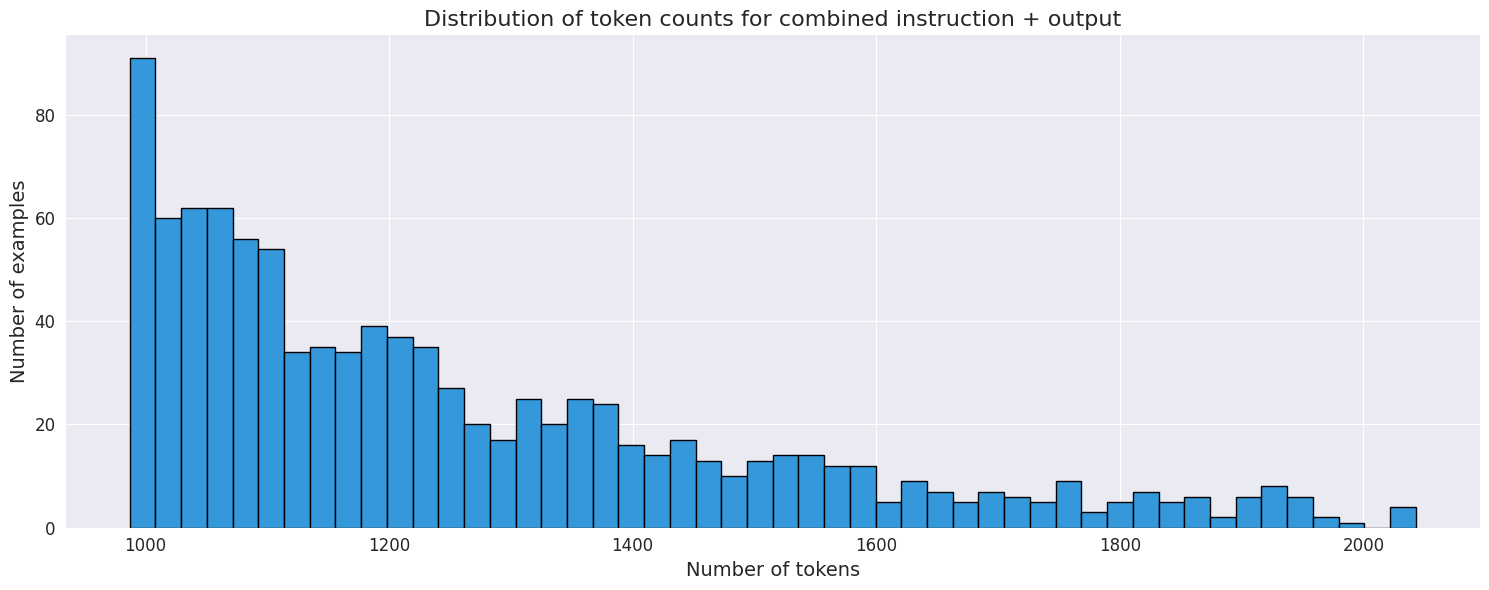

In [68]:
instruction_token_counts = [len(tokenizer.tokenize(example["instruction"])) for example in dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in dataset['train']]
combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

# Plot the distribution of token counts
plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

In [69]:
# Read as pandas DataFrame
dataset['train'].to_pandas()

,instruction,output
0,Let's come up with a rich and complex alien wo...,Planet Name: Xylothar\n\nXylothar is a diverse...
1,"Let\n$$p(x,y) = a_0 + a_1x + a_2y + a_3x^2 + a...","Observe that \begin{align*}\np(0,0) &= a_0 = ..."
2,"Given the code below, refactor it, add comment...",Here is the refactored and commented version:\...
3,Find the area of the region described by $x \g...,"Let $n = \lfloor x \rfloor,$ and let $\{x\} = ..."
4,Let $P$ be the plane passing through the origi...,Let $\mathbf{v} = \begin{pmatrix} x \\ y \\ z ...
...,...,...
995,"BEGININPUT\nBEGINCONTEXT\ndate: June 15, 2019\...",Interactivity in digital media platforms has s...
996,Develop a Golang command-line tool that intera...,To create a Golang command-line tool that inte...
997,BEGININPUT\nBEGINCONTEXT\nfoo: Bar baz bun\nda...,Dr. Xanthea Zandria's research reveals new ins...
998,A beverage company wants to launch a new line ...,To calculate the additional production costs a...


## 5. Chat templates

We need to define a **chat template**, which formats the instructions and responses in a way that is suitable for the model. Here's an example of raw instructions and responses from a [Hugging Face blog post](https://huggingface.co/blog/chat-templates):

```
[
    {"role": "user", "content": "Hi there!"},
    {"role": "assistant", "content": "Nice to meet you!"}
]
```

Note, we do not need to use this chat template if we train the base model.

There are different ways to format it. The most straightforward one would be:

```
User: Hey there!
Assistant: Nice to meet you!
```

In the case of Llama 2, the authors used the following template for the **chat models**:

```
<s>[INST] <<SYS>>
System prompt
<</SYS>>

User prompt [/INST] Model answer </s>
```

Currently, the most popular and standardized chat template is ChatML from OpenAI, which looks like this:

```
<|im_start|>user
Hey there!<|im_end|>
<|im_start|>assistant
Nice to meet you!<|im_end|>
```

The impact of chat templates on the performance of the model is unclear. In most cases, we fine-tune base models that have not been trained with a particular template, which is also why there's no clear standard. However, they are important as they can cause many issues and limit the compatibility of your models.

In [70]:
def chat_template(example):
    example["instruction"] = f"### Instruction:\n{example['instruction']}\n\n### Response:\n"
    return example

dataset = dataset.map(chat_template)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [71]:
dataset['train'].to_pandas()

,instruction,output
0,### Instruction:\nLet's come up with a rich an...,Planet Name: Xylothar\n\nXylothar is a diverse...
1,"### Instruction:\nLet\n$$p(x,y) = a_0 + a_1x +...","Observe that \begin{align*}\np(0,0) &= a_0 = ..."
2,"### Instruction:\nGiven the code below, refact...",Here is the refactored and commented version:\...
3,### Instruction:\nFind the area of the region ...,"Let $n = \lfloor x \rfloor,$ and let $\{x\} = ..."
4,### Instruction:\nLet $P$ be the plane passing...,Let $\mathbf{v} = \begin{pmatrix} x \\ y \\ z ...
...,...,...
995,### Instruction:\nBEGININPUT\nBEGINCONTEXT\nda...,Interactivity in digital media platforms has s...
996,### Instruction:\nDevelop a Golang command-lin...,To create a Golang command-line tool that inte...
997,### Instruction:\nBEGININPUT\nBEGINCONTEXT\nfo...,Dr. Xanthea Zandria's research reveals new ins...
998,### Instruction:\nA beverage company wants to ...,To calculate the additional production costs a...


In [74]:
# Optional: push to Hugging Face Hub
dataset.push_to_hub("mini-platypus-1K", token=HF_TOKEN)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/garg-aayush/mini-platypus-1K/commit/337454e306a58dd77a2d5adcc05de7e5d1da4e1e', commit_message='Upload dataset', commit_description='', oid='337454e306a58dd77a2d5adcc05de7e5d1da4e1e', pr_url=None, pr_revision=None, pr_num=None)